<a href="https://colab.research.google.com/github/8Dis-like/UCLALearning/blob/main/%E2%80%9CFall2025_CM146_HW1_HZ_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

**Name**: Hao Zhang

**UID**: 206548281


## Preparation (download data and import packages)

In [ ]:
# Download a processed version of the data
!wget https://huggingface.co/hk/hw1/resolve/main/mushroom.txt

--2025-10-12 21:28:13--  https://huggingface.co/hk/hw1/resolve/main/mushroom.txt
Resolving huggingface.co (huggingface.co)... 3.166.152.65, 3.166.152.44, 3.166.152.110, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.65|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /api/resolve-cache/models/hk/hw1/d23e2ca56c2eb67af93a318c77348b936dcf4d12/mushroom.txt?%2Fhk%2Fhw1%2Fresolve%2Fmain%2Fmushroom.txt=&etag=%2212401d069edc9c3b8be14236a657b917ab324a19%22 [following]
--2025-10-12 21:28:13--  https://huggingface.co/api/resolve-cache/models/hk/hw1/d23e2ca56c2eb67af93a318c77348b936dcf4d12/mushroom.txt?%2Fhk%2Fhw1%2Fresolve%2Fmain%2Fmushroom.txt=&etag=%2212401d069edc9c3b8be14236a657b917ab324a19%22
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 200 OK
Length: 1264848 (1.2M) [text/plain]
Saving to: ‘mushroom.txt’

mushroom.txt        100%[===================>]   1.21M  --.-KB/s    in 0.06s   

2025-10

In [ ]:
# Use only the provided packages
import sys
import math
import csv
import pandas
import os
import random
import numpy as np
from collections import Counter
from dataclasses import dataclass

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

mpl.lines.width = 2
mpl.axes.labelsize = 14

# Load the Mushroom dataset

In [ ]:
# Load the Mushroom dataset

@dataclass
class Dataset:
    """Class for the dataset."""
    X: np.array
    y: np.array
    Xnames: list
    yname: str

def load_data(data_file='mushroom.txt'):
    """Load data and map strings to numbers."""
    data = pandas.read_csv(data_file).to_numpy()
    n = data.shape[0]
    d = data.shape[1] - 1
    # Map strings to numbers
    X = np.zeros((n, d))
    for i in range(d):
        mapping = {name: j for j, name in enumerate(sorted(set(data[:, i+1])))}
        for j in range(n):
            X[j, i] = mapping[data[j, i+1]]
    mapping = {'POISONOUS': 0, 'EDIBLE': 1}
    y = np.zeros(n, dtype=np.int32)
    for j in range(n):
        y[j] = mapping[data[j, 0]]
    #0 'cap-shape',
    #1 'cap-surface',
    #2 'cap-color',
    #3 'bruises',
    #4 'odor',
    #5 'gill-attachment',
    #6 'gill-spacing',
    #7 'gill-size',
    #8 'gill-color',
    #9 'stalk-shape',
    #10 'stalk-root',
    #11 'stalk-surface-above-ring',
    #12 'stalk-surface-below-ring',
    #13 'stalk-color-above-ring',
    #14 'stalk-color-below-ring',
    #15 'veil-type',
    #16 'veil-color',
    #17 'ring-number',
    #18 'ring-type',
    #19 'spore-print-color',
    #20 'population',
    #21 'habitat',
    Xnames = [
        'cap-shape',
        'cap-surface',
        'cap-color',
        'bruises',
        'odor',
        'gill-attachment',
        'gill-spacing',
        'gill-size',
        'gill-color',
        'stalk-shape',
        'stalk-root',
        'stalk-surface-above-ring',
        'stalk-surface-below-ring',
        'stalk-color-above-ring',
        'stalk-color-below-ring',
        'veil-type',
        'veil-color',
        'ring-number',
        'ring-type',
        'spore-print-color',
        'population',
        'habitat',
    ]
    # We only use these 6 features
    features = [0, 3, 4, 9, 11, 16]
    X = np.take(X, features, axis=-1)
    Xnames = [Xnames[i] for i in features]
    print(f"Features selected: {Xnames}")
    return Dataset(X=X, y=y, Xnames=Xnames, yname='edible')

data = load_data()

X = data.X; Xnames = data.Xnames
y = data.y; yname = data.yname
n,d = X.shape  # n = number of examples, d =  number of features


# Shuffle the data for cross-validation
import random
idx = list(range(n))
random.seed(0)
random.shuffle(idx)
X = np.take(X, idx, axis=0)
y = np.take(y, idx, axis=0)

Features selected: ['cap-shape', 'bruises', 'odor', 'stalk-shape', 'stalk-surface-above-ring', 'veil-color']


# 3.1 Visualizing Features

In [ ]:
def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,20))
    ncol = 3
    nrow = d // ncol + 1
    for i in range(d) :
        fig.add_subplot (nrow,ncol,i+1)
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend()

    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values.    # aka n rows and d columns-- so n instances and d features per instance
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """

    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    label_mapping = {0: 'poisonous', 1: 'edible'}
    for target in targets:
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append(f"{label_mapping[target]}")


    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = list(range(int(math.floor(min(features))), int(math.ceil(max(features)))+1))
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'

    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

    return data, bins, align, labels

Plotting...


<Figure size 640x480 with 0 Axes>

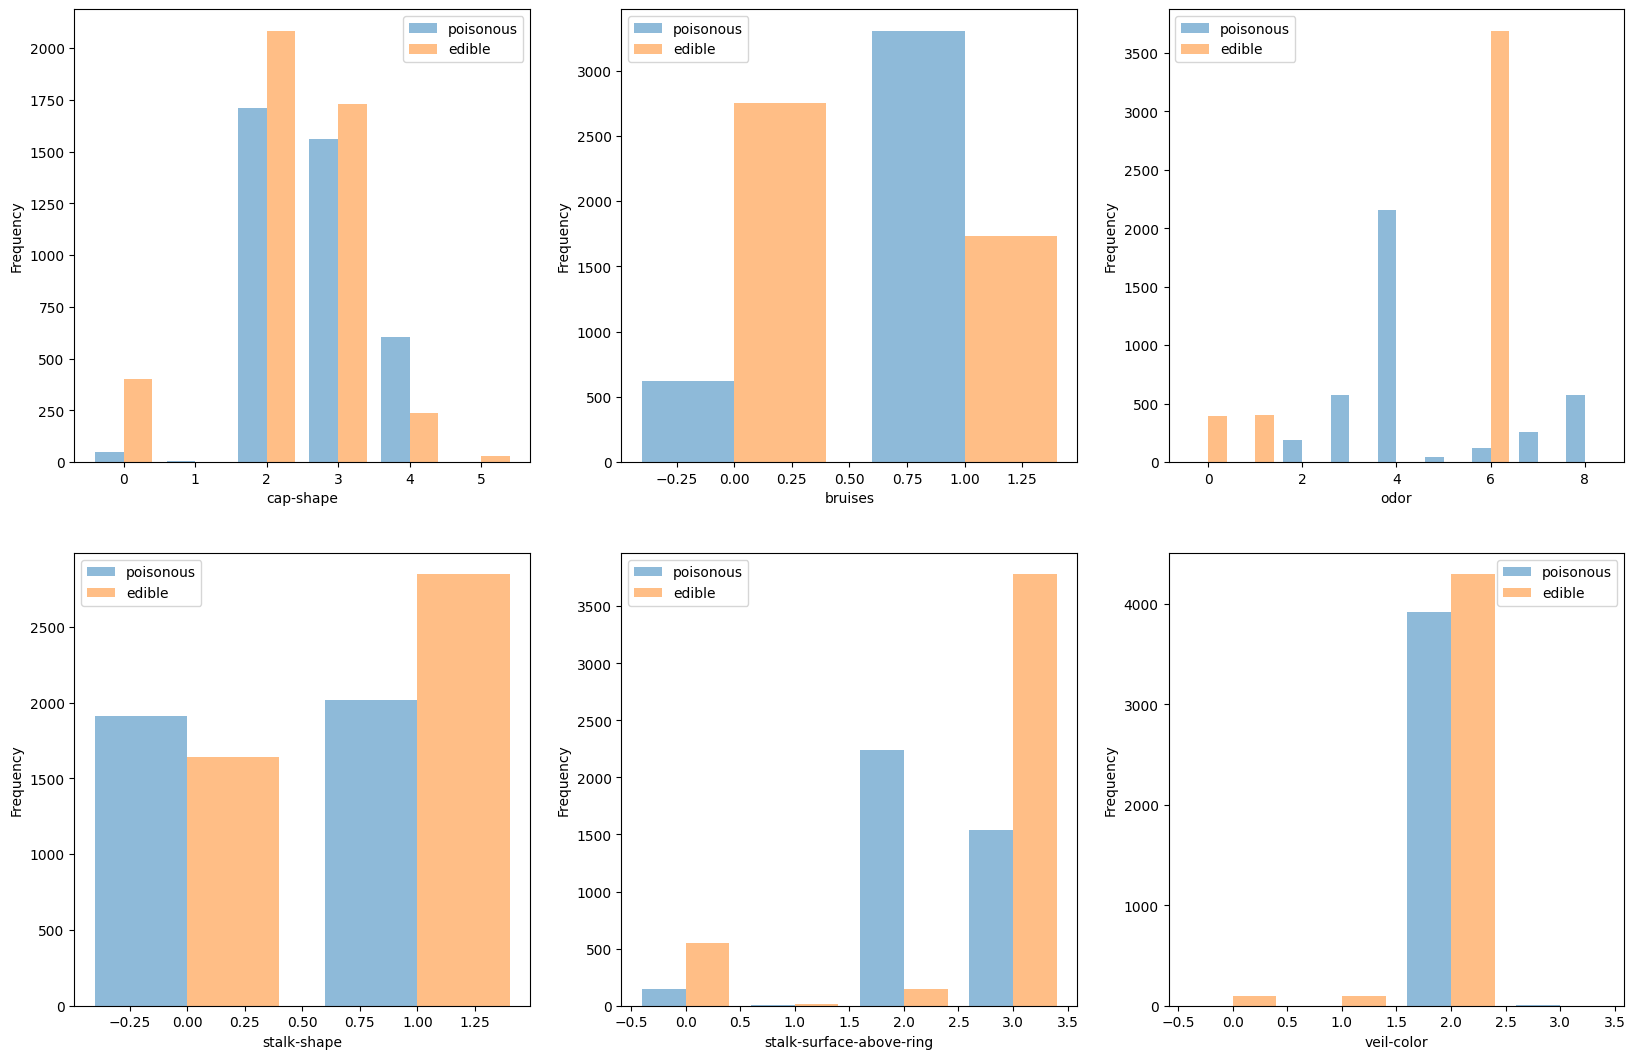

In [ ]:
plt.figure()
# Plot histograms of each feature
print('Plotting...')

plot_histograms (X, y, Xnames=Xnames, yname=yname)

# 3.2 Training and Evaluating Models

## Majority Vote Classifier

In [ ]:
class Classifier(object) :
    """
    Classifier interface.
    """

    def fit(self, X, y):
        raise NotImplementedError()

    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that always predicts the majority class.

        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None

    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """

        # most_common(n) returns an array of the n most commmon values, where the values themselves are a (key, value_count) tuple
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self

    def predict(self, X) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")

        n,d = X.shape
        y = [self.prediction_] * n # makes an n element array, where every element is self.prediction
        return y

In [ ]:
# train Majority Vote classifier on data
print('Classifying using Majority Vote...')
clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
clf.fit(X, y)                  # fit training data using the classifier
y_pred = clf.predict(X)        # take the classifier and run it on the training data
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)

Classifying using Majority Vote...
	-- training error: 0.467


## (a) Implement Random Classifier and Evaluate

In [ ]:
class RandomClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.

        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None

    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """


        # Count the number of occurrences of each class
        counts = Counter(y)
        total = len(y)

        # Compute probabilities for each class
        self.probabilities_ = {cls: count / total for cls, count in counts.items()}
        return self

    def predict(self, X, seed=1234) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None:
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)

        n, d = X.shape

        # Extract classes and their probabilities
        classes = np.array(list(self.probabilities_.keys()))
        probs = np.array(list(self.probabilities_.values()))

        # Randomly assign classes according to class distribution
        y_pred = np.random.choice(classes, size=n, p=probs)

        return y_pred




In [ ]:
def problem_a_solution():
    """
    Initialize a RandomClassifier and evaluate its training error on X and y.

    Returns
    --------------------
        error    -- float, training error of the RandomClassifier, between 0 and 1
    """
    print("Classifying using Random Classifier...")

    # Initialize and train the classifier
    clf = RandomClassifier()
    clf.fit(X, y)

    # Predict on the training data
    y_pred = clf.predict(X)

    # Compute training error (1 - accuracy)
    error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)

    print(f"\t-- training error: {error:.3f}")
    return error

In [ ]:
# ==============================================================================
#  LOCKED CELL: DO NOT EDIT
# ------------------------------------------------------------------------------
# This cell is for grading purposes. Any changes will be overwritten.
# ==============================================================================

print(f'PROBLEM_A_ANSWER: {problem_a_solution()}')

Classifying using Random Classifier...
	-- training error: 0.503
PROBLEM_A_ANSWER: 0.5032679738562091


## (b) Evaluate Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def problem_b_solution():
    """
    Initialize a DecisionTreeClassifier and evaluate its training error on X and y.

    Returns
    --------------------
        error    -- float, training error of the classifier, between 0 and 1
    """
    print("Classifying using Decision Tree (criterion='entropy')...")

    # Initialize the decision tree classifier with entropy criterion
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

    # Train on the full dataset
    clf.fit(X, y)

    # Predict on training data
    y_pred = clf.predict(X)

    # Compute training error
    error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)

    print(f"\t-- training error: {error:.3f}")
    return error


In [ ]:
# ==============================================================================
#  LOCKED CELL: DO NOT EDIT
# ------------------------------------------------------------------------------
# This cell is for grading purposes.
# ==============================================================================

print(f'PROBLEM_B_RESPONSE: {problem_b_solution()}')

Classifying using Decision Tree (criterion='entropy')...
	-- training error: 0.008
PROBLEM_B_RESPONSE: 0.007605466428995844


## (c) Evaluate KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def problem_c_solution():
    """
    Initialize a KNeighborsClassifier and evaluate its training error on X and y.

    Returns
    --------------------
        error_1    -- float, training error of the classifier when k=3, between 0 and 1
        error_2    -- float, training error of the classifier when k=7, between 0 and 1
        error_3    -- float, training error of the classifier when k=21, between 0 and 1
    """
    print("Classifying using k-Nearest Neighbors...")

    ks = [3, 7, 21]
    errors = []

    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X, y)  # store training data
        y_pred = clf.predict(X)
        error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
        print(f"\t-- training error (k={k}): {error:.3f}")
        errors.append(error)

    error_1, error_2, error_3 = errors
    return error_1, error_2, error_3


In [ ]:
# ==============================================================================
#  LOCKED CELL: DO NOT EDIT
# ------------------------------------------------------------------------------
# This cell is for grading purposes.
# ==============================================================================

error_1, error_2, error_3 = problem_c_solution()

print(f'PROBLEM_C_RESPONSE_1: {error_1}')
print(f'PROBLEM_C_RESPONSE_2: {error_2}')
print(f'PROBLEM_C_RESPONSE_3: {error_3}')

Classifying using k-Nearest Neighbors...
	-- training error (k=3): 0.013
	-- training error (k=7): 0.013
	-- training error (k=21): 0.009
PROBLEM_C_RESPONSE_1: 0.012596553773024377
PROBLEM_C_RESPONSE_2: 0.013309566250742755
PROBLEM_C_RESPONSE_3: 0.0087938205585264


## (d) Define the `error()` Function and Evaluate

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
import numpy as np

def error(clf, X, y, ntrials=1, test_size=0.0):
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials
        test_size   -- float, fraction of data to use for testing (e.g. 0.1)

    Returns
    --------------------
        train_error -- float, average training error
        test_error  -- float, average test error
        f1_score    -- float, average test "micro" averaged f1 score
    """
    train_errors = []
    test_errors = []
    f1_scores = []

    # Create stratified splits so class ratios are preserved
    sss = StratifiedShuffleSplit(
        n_splits=ntrials,
        test_size=test_size,
        random_state=0
    )

    for train_idx, test_idx in sss.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Fit classifier on training data
        clf.fit(X_train, y_train)

        # --- Evaluate on training data ---
        y_pred_train = clf.predict(X_train)
        train_acc = metrics.accuracy_score(y_train, y_pred_train)
        train_errors.append(1 - train_acc)

        # --- Evaluate on test data ---
        y_pred_test = clf.predict(X_test)
        test_acc = metrics.accuracy_score(y_test, y_pred_test)
        test_errors.append(1 - test_acc)

        # Compute micro-averaged F1 score on the test set
        f1 = metrics.f1_score(y_test, y_pred_test, average='micro')
        f1_scores.append(f1)

    # Compute mean over trials
    train_error = np.mean(train_errors)
    test_error = np.mean(test_errors)
    f1_score_mean = np.mean(f1_scores)

    return train_error, test_error, f1_score_mean


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def problem_d_solution():
    """
    Incur the error() function on the four classifiers, and report their f1 scores.
    Use 'ntrials=100' and 'test_size=0.10'.

    Returns
    --------------------
        f1_score_1    -- float, f1 score of MajorityVoteClassifier, between 0 and 1
        f1_score_2    -- float, f1 score of RandomClassifier, between 0 and 1
        f1_score_3    -- float, f1 score of DecisionTreeClassifier (use criterion='entropy'), between 0 and 1
        f1_score_4    -- float, f1 score of KNeighborsClassifier (use 'n_neighbors=7'), between 0 and 1
    """
    print("Evaluating classifiers using cross-validation (100 trials, 90/10 split)...")

    # --- Majority Vote Classifier ---
    clf1 = MajorityVoteClassifier()
    train_err, test_err, f1_score_1 = error(clf1, X, y, ntrials=100, test_size=0.10)
    print(f"MajorityVote: train_err={train_err:.3f}, test_err={test_err:.3f}, f1={f1_score_1:.3f}")

    # --- Random Classifier ---
    clf2 = RandomClassifier()
    train_err, test_err, f1_score_2 = error(clf2, X, y, ntrials=100, test_size=0.10)
    print(f"RandomClassifier: train_err={train_err:.3f}, test_err={test_err:.3f}, f1={f1_score_2:.3f}")

    # --- Decision Tree Classifier ---
    clf3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
    train_err, test_err, f1_score_3 = error(clf3, X, y, ntrials=100, test_size=0.10)
    print(f"DecisionTree: train_err={train_err:.3f}, test_err={test_err:.3f}, f1={f1_score_3:.3f}")

    # --- K-Nearest Neighbors (k=7) ---
    clf4 = KNeighborsClassifier(n_neighbors=7)
    train_err, test_err, f1_score_4 = error(clf4, X, y, ntrials=100, test_size=0.10)
    print(f"KNN (k=7): train_err={train_err:.3f}, test_err={test_err:.3f}, f1={f1_score_4:.3f}")

    return f1_score_1, f1_score_2, f1_score_3, f1_score_4


In [ ]:
# ==============================================================================
#  LOCKED CELL: DO NOT EDIT
# ------------------------------------------------------------------------------
# This cell is for grading purposes.
# ==============================================================================

f1_score_1, f1_score_2, f1_score_3, f1_score_4 = problem_d_solution()

print(f'PROBLEM_D_RESPONSE_1: {f1_score_1}')
print(f'PROBLEM_D_RESPONSE_2: {f1_score_2}')
print(f'PROBLEM_D_RESPONSE_3: {f1_score_3}')
print(f'PROBLEM_D_RESPONSE_4: {f1_score_4}')

Evaluating classifiers using cross-validation (100 trials, 90/10 split)...
MajorityVote: train_err=0.467, test_err=0.467, f1=0.533
RandomClassifier: train_err=0.498, test_err=0.498, f1=0.502
DecisionTree: train_err=0.008, test_err=0.007, f1=0.993
KNN (k=7): train_err=0.009, test_err=0.009, f1=0.991
PROBLEM_D_RESPONSE_1: 0.533254156769596
PROBLEM_D_RESPONSE_2: 0.5018527315914489
PROBLEM_D_RESPONSE_3: 0.9926484560570071
PROBLEM_D_RESPONSE_4: 0.9910570071258907


## (e) Find the Best Value of K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def problem_e_solution():
    """
    Use 5-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier,
    and the corresponding f1 score.

    Returns
    --------------------
        best_k      -- integer, best value of k
        best_f1     -- float, f1 score of KNeighborsClassifier, between 0 and 1
        k_values    -- list of integers, all tested k values
        f1_scores   -- list of floats, corresponding average F1 scores
    """
    print("Running 5-fold cross-validation for k = 1, 3, ..., 49")

    k_values = list(range(1, 51, 2))  # all odd k values from 1 to 50
    f1_scores = []

    # Evaluate each k using 5-fold cross-validation with micro-averaged F1 score
    for k in k_values:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro')
        mean_score = np.mean(scores)
        f1_scores.append(mean_score)
        print(f"k={k:2d}, mean F1={mean_score:.4f}")

    # Find best k (the one with highest mean F1 score)
    best_index = int(np.argmax(f1_scores))
    best_k = k_values[best_index]
    best_f1 = f1_scores[best_index]

    print(f"\nBest k = {best_k}, with mean F1 score = {best_f1:.4f}")

    # Return both the best parameters and all arrays for plotting
    return best_k, best_f1, k_values, f1_scores

Running 5-fold cross-validation for k = 1, 3, ..., 49
k= 1, mean F1=0.9853
k= 3, mean F1=0.9878
k= 5, mean F1=0.9872
k= 7, mean F1=0.9872
k= 9, mean F1=0.9886
k=11, mean F1=0.9869
k=13, mean F1=0.9869
k=15, mean F1=0.9908
k=17, mean F1=0.9912
k=19, mean F1=0.9912
k=21, mean F1=0.9912
k=23, mean F1=0.9912
k=25, mean F1=0.9912
k=27, mean F1=0.9912
k=29, mean F1=0.9912
k=31, mean F1=0.9912
k=33, mean F1=0.9913
k=35, mean F1=0.9912
k=37, mean F1=0.9912
k=39, mean F1=0.9912
k=41, mean F1=0.9907
k=43, mean F1=0.9911
k=45, mean F1=0.9907
k=47, mean F1=0.9907
k=49, mean F1=0.9906

Best k = 33, with mean F1 score = 0.9913
PROBLEM_E_RESPONSE_1: 33
PROBLEM_E_RESPONSE_2: 0.9913250148544266


In [ ]:
# =====================================================================
# LOCKED GRADING CELL (simulated call)
# =====================================================================
best_k, f1_score_val, k_values, f1_scores = problem_e_solution()
print(f'PROBLEM_E_RESPONSE_1: {best_k}')
print(f'PROBLEM_E_RESPONSE_2: {f1_score_val}')

Running 5-fold cross-validation for k = 1, 3, ..., 49
k= 1, mean F1=0.9853
k= 3, mean F1=0.9878
k= 5, mean F1=0.9872
k= 7, mean F1=0.9872
k= 9, mean F1=0.9886
k=11, mean F1=0.9869
k=13, mean F1=0.9869
k=15, mean F1=0.9908
k=17, mean F1=0.9912
k=19, mean F1=0.9912
k=21, mean F1=0.9912
k=23, mean F1=0.9912
k=25, mean F1=0.9912
k=27, mean F1=0.9912
k=29, mean F1=0.9912
k=31, mean F1=0.9912
k=33, mean F1=0.9913
k=35, mean F1=0.9912
k=37, mean F1=0.9912
k=39, mean F1=0.9912
k=41, mean F1=0.9907
k=43, mean F1=0.9911
k=45, mean F1=0.9907
k=47, mean F1=0.9907
k=49, mean F1=0.9906

Best k = 33, with mean F1 score = 0.9913
PROBLEM_E_RESPONSE_1: 33
PROBLEM_E_RESPONSE_2: 0.9913250148544266


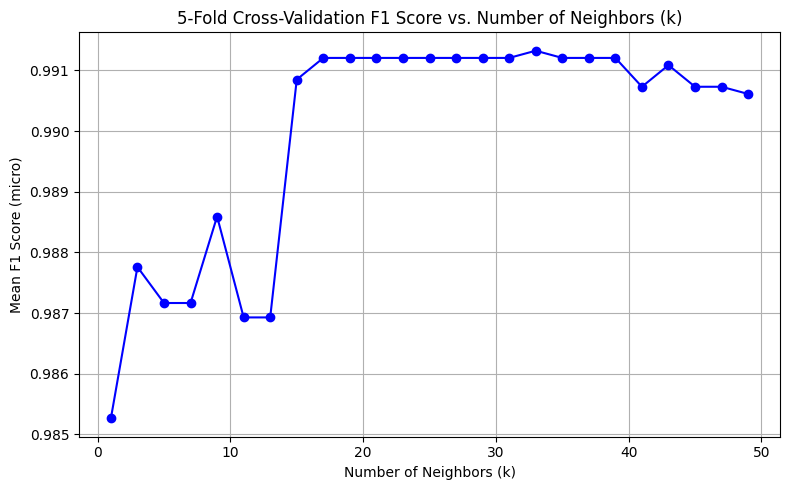

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='blue')
plt.title('5-Fold Cross-Validation F1 Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean F1 Score (micro)')
plt.grid(True)
plt.tight_layout()
plt.show()

## (f) Find the Best Depth

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

def problem_f_solution():
    """
    Use the 20-fold cross-validation to find the best depth for DecisionTreeClassifier,
    and the corresponding f1 score.

    Returns
    --------------------
        best_depth  -- integer, best depth value
        best_f1     -- float, f1 score, between 0 and 1
        depths      -- list of tested depths
        train_scores_mean -- list of average training F1 scores
        test_scores_mean  -- list of average test F1 scores
    """

    print("Running 20-fold cross-validation for Decision Tree depths = 1, 2, ..., 20")

    depths = range(1, 21)
    train_scores_mean = []
    test_scores_mean = []

    for depth in depths:
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)

        # cross_validate returns both training and validation (test) scores
        scores = cross_validate(
            clf, X, y,
            cv=20,
            scoring='f1_micro',
            return_train_score=True
        )

        train_scores_mean.append(np.mean(scores['train_score']))
        test_scores_mean.append(np.mean(scores['test_score']))
        print(f"Depth={depth:2d}, Train F1={np.mean(scores['train_score']):.4f}, Test F1={np.mean(scores['test_score']):.4f}")

    # Find depth with highest mean validation F1 score (choose smallest if tie)
    best_index = int(np.argmax(test_scores_mean))
    best_depth = int(depths[best_index])
    best_f1 = test_scores_mean[best_index]

    print(f"\nBest depth = {best_depth}, with mean F1 score = {best_f1:.4f}")

    return best_depth, best_f1, list(depths), train_scores_mean, test_scores_mean


In [ ]:
# ==============================================================================
#  LOCKED CELL: DO NOT EDIT
# ------------------------------------------------------------------------------
# This cell is for grading purposes.
# ==============================================================================
best_depth, best_f1, depths, train_scores_mean, test_scores_mean = problem_f_solution()
print(f'PROBLEM_F_RESPONSE_1: {best_depth}')
print(f'PROBLEM_F_RESPONSE_2: {best_f1}')

Running 20-fold cross-validation for Decision Tree depths = 1, 2, ..., 20
Depth= 1, Train F1=0.7919, Test F1=0.7919
Depth= 2, Train F1=0.9857, Test F1=0.9857
Depth= 3, Train F1=0.9857, Test F1=0.9857
Depth= 4, Train F1=0.9857, Test F1=0.9857
Depth= 5, Train F1=0.9905, Test F1=0.9905
Depth= 6, Train F1=0.9914, Test F1=0.9914
Depth= 7, Train F1=0.9914, Test F1=0.9914
Depth= 8, Train F1=0.9914, Test F1=0.9914
Depth= 9, Train F1=0.9924, Test F1=0.9924
Depth=10, Train F1=0.9924, Test F1=0.9924
Depth=11, Train F1=0.9924, Test F1=0.9924
Depth=12, Train F1=0.9924, Test F1=0.9924
Depth=13, Train F1=0.9924, Test F1=0.9924
Depth=14, Train F1=0.9924, Test F1=0.9924
Depth=15, Train F1=0.9924, Test F1=0.9924
Depth=16, Train F1=0.9924, Test F1=0.9924
Depth=17, Train F1=0.9924, Test F1=0.9924
Depth=18, Train F1=0.9924, Test F1=0.9924
Depth=19, Train F1=0.9924, Test F1=0.9924
Depth=20, Train F1=0.9924, Test F1=0.9924

Best depth = 9, with mean F1 score = 0.9924
PROBLEM_F_RESPONSE_1: 9
PROBLEM_F_RESPONS

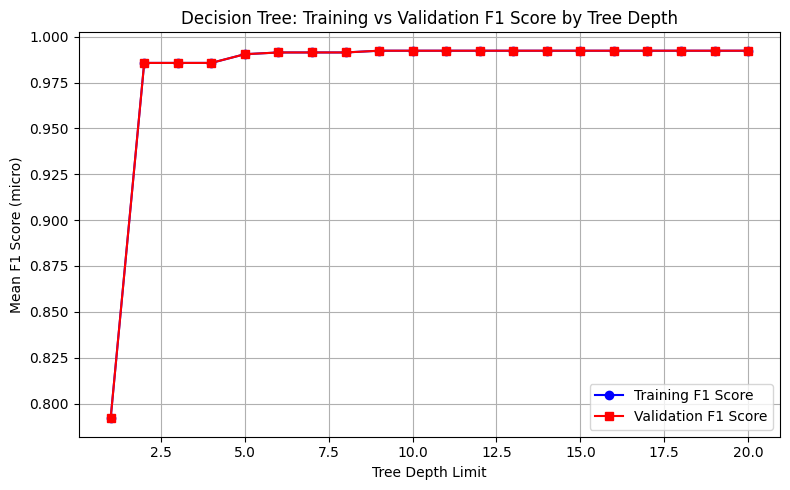

In [ ]:
### ===== TODO (f) plot: START ===== ###
plt.figure(figsize=(8, 5))
plt.plot(depths, train_scores_mean, marker='o', label='Training F1 Score', color='blue')
plt.plot(depths, test_scores_mean, marker='s', label='Validation F1 Score', color='red')
plt.title('Decision Tree: Training vs Validation F1 Score by Tree Depth')
plt.xlabel('Tree Depth Limit')
plt.ylabel('Mean F1 Score (micro)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
### ========== TODO : END ========== ###


## (g) Utilize the Decision Tree

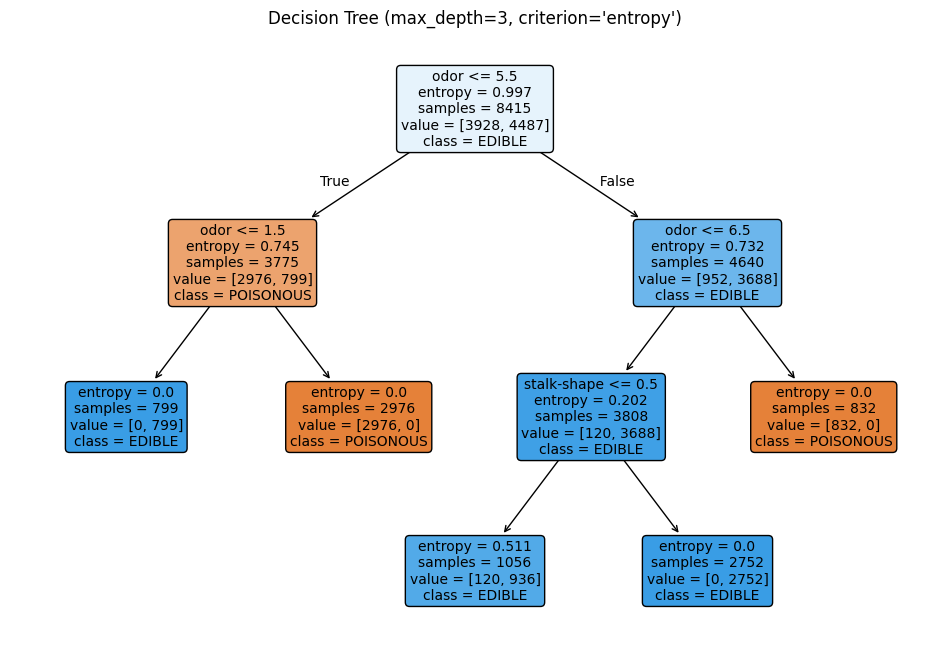

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# === Plot the trained tree ===
plt.figure(figsize=(12, 8))

### ===== TODO (g) plot: START ===== ###
# Fit Decision Tree with entropy criterion, max depth = 3, random state = 0
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X, y)

# Visualize the decision tree
plot_tree(
    clf,
    feature_names=Xnames,           # feature labels for readability
    class_names=['POISONOUS', 'EDIBLE'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=3, criterion='entropy')")
plt.show()
### ========== TODO : END ========== ###

In [ ]:
# === Predict the edibility of the given example ===
def problem_g_solution():
    """
    Determine if the given example x=[0,1,6,0,0,0] is edible.

    Returns
    --------------------
        edible  -- boolean, True if the example is edible, False otherwise
    """
    ### ========== TODO (g): START ========== ###
    # Example feature vector
    x = np.array([[0, 1, 6, 0, 0, 0]])  # shape (1,6)

    # Fit the decision tree model again (same as used for the plot)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    clf.fit(X, y)

    # Predict edible (1) or poisonous (0)
    y_pred = clf.predict(x)[0]

    # Convert to boolean
    edible = True if y_pred == 1 else False
    ### ========== TODO : END ========== ###
    return edible


In [ ]:
# ==============================================================================
#  LOCKED CELL: DO NOT EDIT
# ------------------------------------------------------------------------------
# This cell is for grading purposes.
# ==============================================================================

edible = problem_g_solution()
print(f'PROBLEM_G_RESPONSE: {edible}')

PROBLEM_G_RESPONSE: True
